<a href="https://colab.research.google.com/github/Siskanti/Machine-Learning/blob/main/Praktisi_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Siskanti*

*H071201064*

*Sistem Informasi*

# *Clustering*

In [43]:
from sklearn import datasets 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt


<function matplotlib.pyplot.show(*args, **kw)>

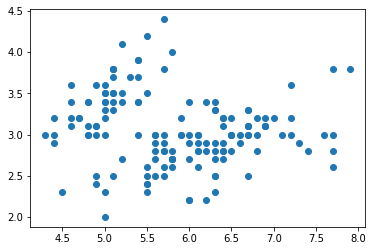

In [18]:
iris = datasets.load_iris()
features = iris.data
plt.scatter(features[:,0], features[:,1])
plt.show

In [19]:
scaler = StandardScaler()
features_standarized = scaler.fit_transform(features)

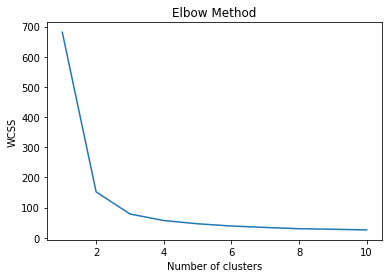

In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++',
  max_iter = 300, n_init=10, random_state=0)
  kmeans.fit(features)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


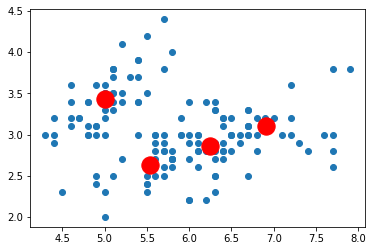

In [21]:
#Menambahkan 4 titik pusat cluster
kmeans = KMeans(n_clusters=4, init='k-means++',
    max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(features)
plt.scatter(features[:,0], features[:,1])
plt.scatter(kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1], s=300, c='red')
plt.show()

# Clustering K-Means dengan Dataku.txt

In [31]:
#import library yang akan digunakan
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import time
import itertools

In [32]:
#membaca dataset
datasetPath = "drive/MyDrive/Machine Learning/dataku.txt"
dataset = np.loadtxt(datasetPath, delimiter=" ")

In [33]:
#mendefinisikan parameter k-means clustering
k = 2 #jumlah cluster yang diinginkan
iterationCounter = 0 #counter untuk melakukan iterasi
input = dataset #melakukan input data

In [34]:
#fungsi untuk inisialisasi titik pusat cluster(random)
def initCentroid(dataIn, k):
  result = dataIn[np.random.choice(dataIn.shape[0], k, replace=False)]
  return result

In [35]:
#fungsi untuk plot hasil cluster per iterasi
def plotClusterResult(listClusterMembers, centorid, iteration, converged):
  n = listClusterMembers.__len__()
  color = iter(cm.rainbow(np.linspace(0, 1, n)))
  plt.figure("result")
  plt.clf()
  plt.title("iteration-" + iteration)
  marker = itertools.cycle(('-','*','^','x','+'))
  for i in range(n):
    col = next(color)
    memberCluster = np.asmatrix(listClusterMembers[i])
    plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]),
                marker=marker.__next__(), s=100, c=col, label="klaster-"+str(i+1))
  for i in range(n):
    plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=marekr.__next__()
    , c=col, label="centorid-"+str(i + 1))
  if(converged == 0):
    plt.legend()
    plt.ion()
    plt.show()
    plt.pause(0.1)
  if (converged == 1):
    plt.legend()
    plt.show(block=True)

In [36]:
#fungsi utama algoritma k-Means
def KMeans(data, centroidInt):
  nCluster = k #banyaknya cluster
  global iterationCounter
  centroidInt = np.matrix(centroidInt)
  #melakukan looping hingga convergen
  while(True):
    iterationCounter +=1
    euclideanMatrixAllCluster = np.ndarray(shape=(data.shape[0], 0))
    #ulangi proses untuk semua cluster
    for i in range(0, nCluster):
      centroidRepeated = np.repeat(centroidInit[i,:], data.shape[0], axis=0)
      deltaMatrix = abs(np.substract(data,centroidRepeated))
      #menghitung jarak Euclidean
      euclideanMatrx = np.sqrt(np.square(deltaMatrix).sum(axis=1))
      euclideanMatrixAllCluster = \
        np.concatenate((euclideanMatrixAllCluster, euclideanMatrixAllCluster), axis=1)
      #tempatkan data ke cluster yang jarak euclideannya paling dekat
      clusterMatrix = np.ravel(np.argmin(np.matrix(euclideanMatrixAllCluster), axis=1))
      listClusterMember = [[] for i in range(k)]
      for i in range(0, data.shape[0]):
        listClusterMember[np.asscalar(clusterMatrix[i])].append(data[i,:])
        #menghitung titik pusat cluster terbaru
        newCentroid = np.ndarray(shape=(0, centroidInit.shape[1]))
        for i in range(0,nCluster):
          memberCluster = np.asmatrix(listClusterMember[i])
          centroidCluster = memberCluster.mean(axis=0)
          newCentroid = np.concatenate((newCentroid, centroidCluster), axis=0)
        print("iter: ", iterationCounter)
        print("centroid: ", newCentroid)
        #break dri loop jika sudah convergen
        if((centroidInit == newCentroid).all()):
          break
        #update titik pusat cluster dengan nilai yang baru
        centroidInit = newCentroid
        #plot hasil cluster per iterasi
        plotClusterResult(listClusterMember, centroidInit, str(iterationCounter),0)
        time.sleep(1)
    return listClusterMember, centroidInit


In [ ]:
#panggil fungsi inisialisasi cluster
centroidInit = initCentroid(input, k)
#panggil fungsi k-means
clusterResults, centroid = kMeans(input, centroidInit)
#plot hasil akhir cluster setelah convergen
plotClusterResult(clusterResults, centroid, str(iterationCounter) + " (converged)", 1)

# Clustering K-Means dengan konsumen.csv

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
dataset = pd.read_csv('drive/MyDrive/Machine Learning/konsumen.csv')
dataset.keys()

Index(['Gaji', 'Pengeluaran'], dtype='object')

In [3]:
dataku = pd.DataFrame(dataset)
dataku.head()

,Gaji,Pengeluaran
0,2500,1750
1,3800,4200
2,3900,3800
3,4350,5500
4,4400,3200


In [4]:
#konversi ke data array
X = np.asarray(dataset)
print(X)

[[ 2500  1750]
 [ 3800  4200]
 [ 3900  3800]
 [ 4350  5500]
 [ 4400  3200]
 [ 5500  5450]
 [ 5600  5950]
 [ 5750  4100]
 [ 6850  6050]
 [ 6900  8500]
 [ 7250  9500]
 [ 7350  6050]
 [ 7500  8500]
 [ 7800  9500]
 [ 8200  8300]
 [ 8500  6500]
 [ 8550  8400]
 [ 8750  6000]
 [ 9100 10500]
 [ 9100  8500]]


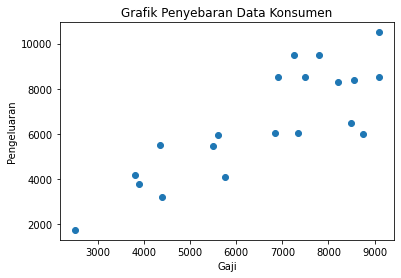

In [5]:
#menampilkan data dalam bentuk scatter plot
plt.scatter(X[:,0], X[:,1], label='True Position')
plt.xlabel("Gaji")
plt.ylabel("Pengeluaran")
plt.title("Grafik Penyebaran Data Konsumen")
plt.show()

In [7]:
#mengaktifkan K-Means dengan jumlah K=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [8]:
#menampilkan nilai centroid yang digenerate oleh algoritma
print(kmeans.cluster_centers_)

[[7987.5  8025.  ]
 [4475.   4243.75]]


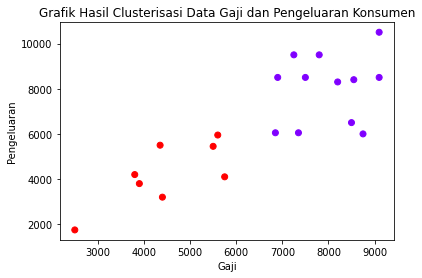

In [9]:
#Plot data point
#memvisualisasikan hasil clusterisasi data konsumen
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("Gaji")
plt.ylabel("Pengeluaran")
plt.title("Grafik Hasil Clusterisasi Data Gaji dan Pengeluaran Konsumen")
plt.show()

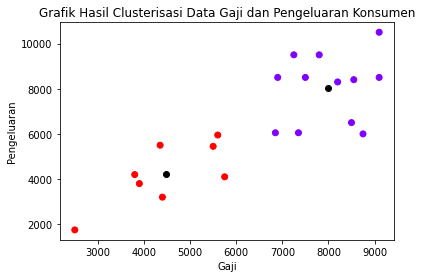

In [10]:
#plot Data point
#membisualisasikan clusterisasi dengan centroid dari masing-masing cluster
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.xlabel("Gaji")
plt.ylabel("Pengeluaran")
plt.title("Grafik Hasil Clusterisasi Data Gaji dan Pengeluaran Konsumen")
plt.show()